**Ensuring plot visibility in notebook!**

In [1]:
%matplotlib inline

**Relevant imports!**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read in the csv file as a dataframe and show the df info.**

In [3]:
df=pd.read_csv('911.csv')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Show the top 5 rows of the dataframe.**

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**What are the top 5 zip codes fir 911 Calls.**

In [5]:
print(df['zip'].value_counts().head()) 

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64


**What are the top 5 townships for 911 calls.**

In [6]:
print(df['twp'].value_counts().head())

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64


**Take a look at the 'title' column, how many unique title codes are there.**

In [7]:
print(df['title'].nunique())

110


**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value. For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [8]:
df['Reason']=df['title'].apply(lambda title_val:title_val.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


**What is the most common Reason for a 911 call based off of this new column.**

In [9]:
print(df['Reason'].value_counts().head(3))

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64


**Now use seaborn to create a countplot of 911 calls by Reason.**

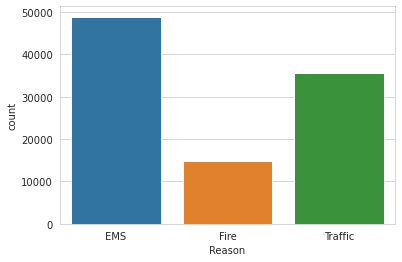

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Reason',data=df)

**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column.**

In [11]:
print(df['timeStamp'].dtype)
print(type(df['timeStamp'].iloc[0]))

object
<class 'str'>


**Convert the timeStamp col from String to timestamp.**

In [12]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])
print(type(df['timeStamp'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


**Fetch out the hour, month, dayofweek from the timestamp.**

In [13]:
df['Hour']=df['timeStamp'].apply(lambda timeStamp:timeStamp.hour) 
df['Month']=df['timeStamp'].apply(lambda timeStamp:timeStamp.month) 
df['Day of Week']=df['timeStamp'].apply(lambda timeStamp:timeStamp.dayofweek) 
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


**Create a dictionary to map the numerical days of week to the actual week names.**

In [14]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']=df['Day of Week'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

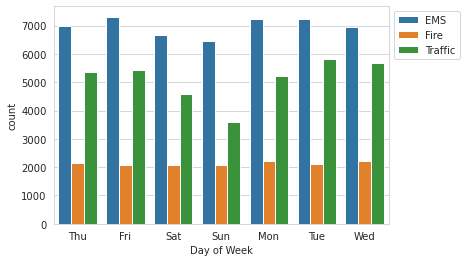

In [15]:
sns.countplot(x='Day of Week',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1,1))

**Now use seaborn to create a countplot of the Month column with the hue based off of the Reason column.**

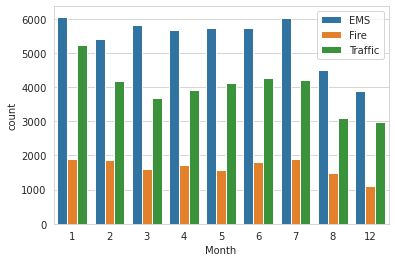

In [16]:
sns.countplot(x='Month',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1,1))

**To have a better visualization of the decending nature of the calls from month 8 to 12 it's better to plot  a line plot.**

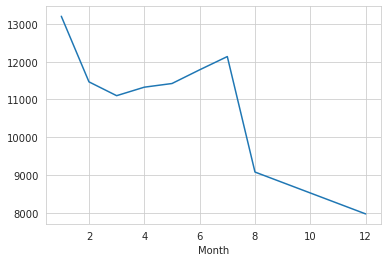

In [17]:
df.groupby('Month').count()['lat'].plot()

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

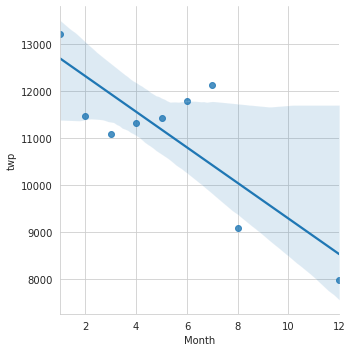

In [18]:
sns.lmplot(x='Month',y='twp',data=df.groupby('Month').count().reset_index())

**Fetch out the date from the timestamp column.**

In [19]:
df['date']=df['timeStamp'].apply(lambda timeStamp:timeStamp.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

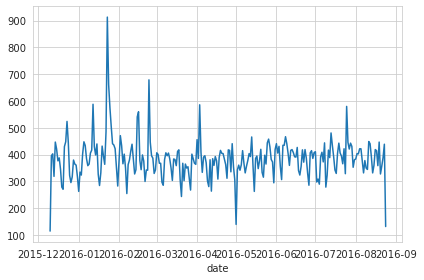

In [20]:
df.groupby('date').count()['lat'].plot()
plt.tight_layout()

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call.**

Text(0.5, 1.0, 'EMS')

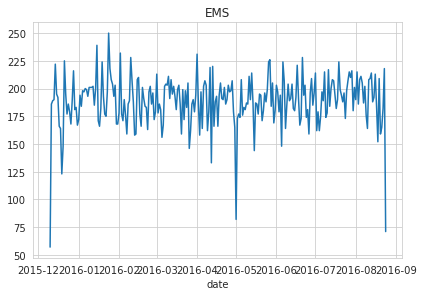

In [21]:
df[df['Reason']=='EMS'].groupby('date').count()['lat'].plot()
plt.tight_layout()
plt.title('EMS')

**Plot for Reason=Fire.**

Text(0.5, 1.0, 'Fire')

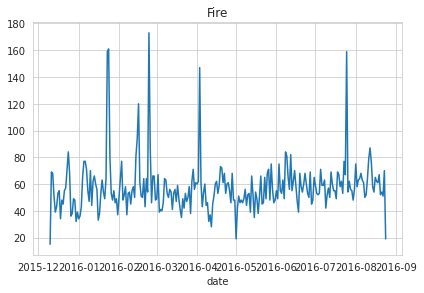

In [22]:
df[df['Reason']=='Fire'].groupby('date').count()['lat'].plot()
plt.tight_layout()
plt.title('Fire')

**Plot for Reason=Traffic.**

Text(0.5, 1.0, 'Traffic')

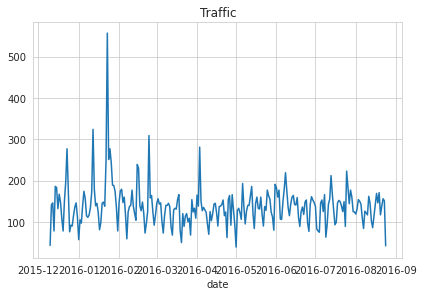

In [23]:
df[df['Reason']=='Traffic'].groupby('date').count()['lat'].plot()
plt.tight_layout()
plt.title('Traffic')

**Now let's move on to creating heatmaps with seaborn and our data to represent number of calls per hour per day.**

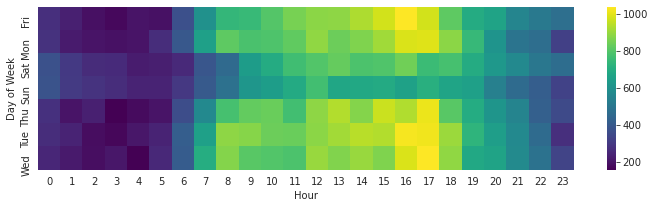

In [24]:
df_calls_perhour=df.groupby(['Day of Week','Hour']).count()['Reason'].unstack()
plt.figure(figsize=(12,3))
sns.heatmap(df_calls_perhour,cmap='viridis')

**Now let's move on to creating clustermaps with seaborn and our data to represent number of calls per hour per day.**

<Figure size 864x216 with 0 Axes>

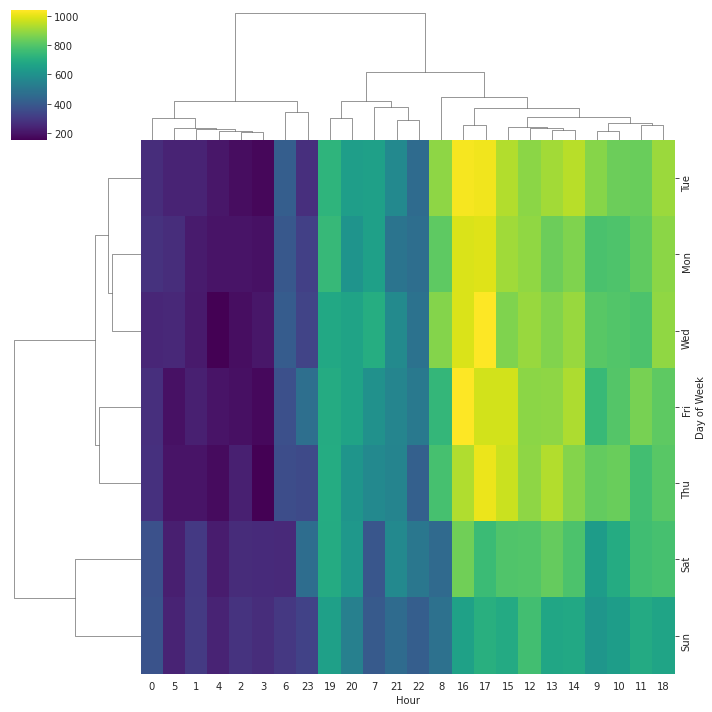

In [25]:
df_calls_perhour=df.groupby(['Day of Week','Hour']).count()['Reason'].unstack()
plt.figure(figsize=(12,3))
sns.clustermap(df_calls_perhour,cmap='viridis')

**Now let's move on to creating heatmaps with seaborn and our data to represent number of calls per day per month.**

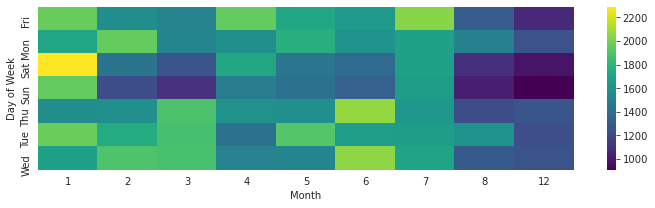

In [26]:
df_calls_perhour=df.groupby(['Day of Week','Month']).count()['Reason'].unstack()
plt.figure(figsize=(12,3))
sns.heatmap(df_calls_perhour,cmap='viridis')

**Now let's move on to creating clustermaps with seaborn and our data to represent number of calls per day per month.**

<Figure size 864x216 with 0 Axes>

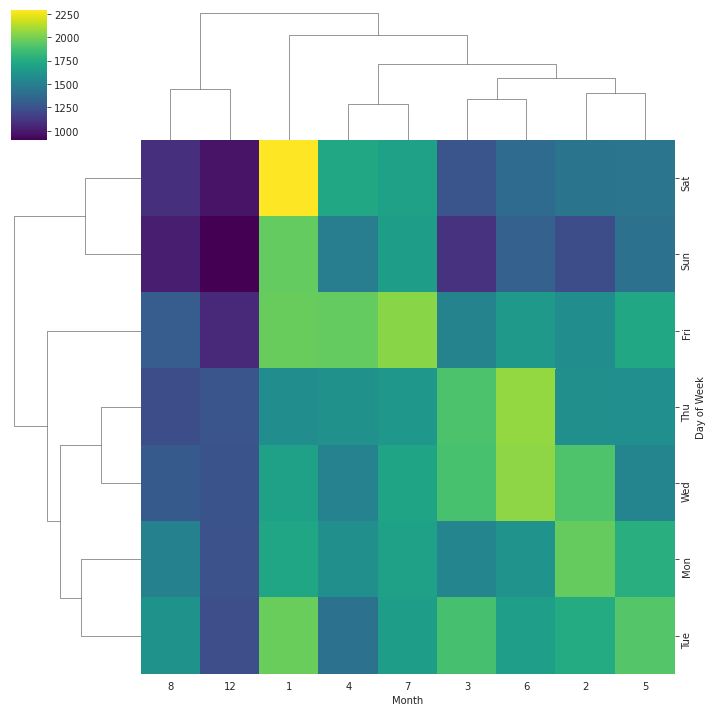

In [27]:
df_calls_perhour=df.groupby(['Day of Week','Month']).count()['Reason'].unstack()
plt.figure(figsize=(12,3))
sns.clustermap(df_calls_perhour,cmap='viridis')